In [16]:
%matplotlib inline

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
import numpy as np
import pandas
import os
import utils

np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

In [2]:
dataPath = os.path.join(os.getenv("HOME"), 
                        'Project/WomenIndustrySurveyHolzblatt/Data/DataForClustering/slidersByItem.csv')

data = pandas.read_csv(dataPath, sep=',')
npData = np.loadtxt(dataPath,delimiter=',',skiprows=1)
# Replace 0s with their column's median:
npData = utils.replaceZerosNparray(npData)
data   = utils.replaceZerosDataFrame(data)


In [3]:
# Transpose to get the questions as rows, the people as columns
npData = npData.transpose()
data = data.transpose()

In [4]:
# Remove the response_id column if there:
if data.index[0] == 'response_id':
    data = data.iloc[1:]
    npData = npData[1:]
print(npData)
data

[[  71.   88.   65. ...,  100.   35.   88.]
 [  82.   82.   71. ...,  100.   18.   53.]
 [  88.   88.   71. ...,  100.   59.   53.]
 ..., 
 [  59.   94.   94. ...,   94.   35.   88.]
 [  82.   88.   76. ...,  100.   24.  100.]
 [  88.   82.   76. ...,  100.   53.   53.]]


,0,1,2,3,4,5,6,7,8,9,...,174,175,176,177,178,179,180,181,182,183
GenderBalance|MenTalkDifferently,71.0,88.0,65.0,41.0,94.0,71.0,88.0,82.0,82.0,53.0,...,100.0,82.0,82.0,47.0,53.0,100.0,88.0,100.0,35.0,88.0
GenderBalance|MustProveMyselfDaily,82.0,82.0,71.0,12.0,94.0,35.0,94.0,65.0,65.0,65.0,...,88.0,65.0,65.0,82.0,71.0,71.0,71.0,100.0,18.0,53.0
GenderBalance|NoClearValues,88.0,88.0,71.0,24.0,71.0,41.0,100.0,76.0,76.0,76.0,...,53.0,76.0,76.0,100.0,82.0,100.0,24.0,100.0,59.0,53.0
GenderBalance|TreatedDifferently,94.0,88.0,53.0,71.0,100.0,59.0,100.0,82.0,82.0,82.0,...,88.0,82.0,82.0,100.0,94.0,100.0,35.0,100.0,35.0,71.0
GenderBalance|UsuallyOnlyWoman,47.0,88.0,71.0,88.0,59.0,71.0,82.0,71.0,71.0,82.0,...,88.0,71.0,71.0,71.0,71.0,65.0,100.0,53.0,47.0,100.0
Manager|AmOnMyOwn,65.0,76.0,76.0,24.0,71.0,53.0,94.0,59.0,59.0,59.0,...,71.0,59.0,59.0,100.0,88.0,41.0,59.0,100.0,18.0,47.0
Manager|ExpectedToAlreadyKnow,59.0,41.0,94.0,88.0,94.0,94.0,88.0,65.0,65.0,53.0,...,18.0,65.0,65.0,82.0,59.0,65.0,24.0,100.0,65.0,47.0
Manager|HesitateNewChallenges,59.0,76.0,82.0,76.0,47.0,94.0,53.0,76.0,76.0,100.0,...,59.0,76.0,76.0,100.0,88.0,100.0,100.0,100.0,76.0,53.0
Manager|MatesQuestionWorkQuality,82.0,71.0,88.0,35.0,76.0,94.0,88.0,71.0,71.0,47.0,...,59.0,71.0,71.0,59.0,100.0,71.0,100.0,100.0,12.0,53.0
Manager|MatesUninvolved,47.0,65.0,82.0,47.0,94.0,94.0,88.0,65.0,65.0,76.0,...,71.0,65.0,65.0,100.0,100.0,76.0,94.0,100.0,65.0,41.0


In [5]:
data.shape

(39, 184)

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


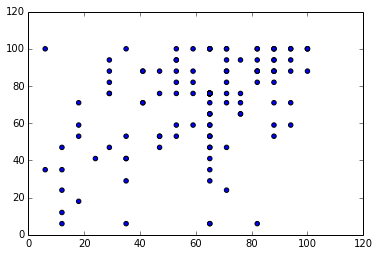

In [6]:
plt.scatter(npData[1,:], npData[2,:])
plt.show()

Create info on successively clustering data
into ever larger clusters. Use e.g. the Ward
option, which measures distance between data items
by the difference in their variance (the more similar
the variance the closer they are):
           Feature1   Feature2      Distance   SizeResultingCluster
   array([[  52.     ,   53.     ,    0.04151,    2.     ],
          [  14.     ,   79.     ,    0.05914,    2.     ],
          [  33.     ,   68.     ,    0.07107,    2.     ],
          [  17.     ,   73.     ,    0.07137,    2.     ],
          [   1.     ,    8.     ,    0.07543,    2.     ],
                       ...
          [  62.     ,  152.     ,    0.1726 ,    3.     ],
          [  41.     ,  158.     ,    0.1779 ,    3.     ],
                       ...
          
First line: feature 52 is combined with feature 53 into
a cluster of size 2. Distance in variance between them 
is 0.04151. First cluster of 3: item 62 with 152. The dataset
of this table had data items 0-149. Any 'data item' with a 
number 150 or higher refers to an already formed cluster.
To find items that made up this cluster: 
     theMergeLine = lineGTDataLength - datalength

In [7]:
clusterInfo = linkage(data, 'ward')      # c=85
#clusterInfo = linkage(data, 'centroid') # c=88
#clusterInfo = linkage(data, 'weighted') # c=76
#clusterInfo = linkage(data, 'average')  # c=88
#clusterInfo = linkage(data, 'complete') # c=84
#clusterInfo = linkage(data, 'single')    # c=86

# Cophenet correlation coefficient measures 
# how faithfully a dendrogram preserves pairwise
# distance between the original data points:
(c, coph_dists) = cophenet(clusterInfo, pdist(data))
c

0.45163356635826585

In [8]:
pandas.DataFrame(clusterInfo[:20],columns=['feature1', 'feature2', 'distance', 'clusterSize'])

,feature1,feature2,distance,clusterSize
0,12.0,15.0,207.289652,2.0
1,33.0,35.0,220.915142,2.0
2,32.0,40.0,241.510179,3.0
3,14.0,16.0,250.585315,2.0
4,2.0,3.0,252.495545,2.0
5,0.0,4.0,267.535044,2.0
6,31.0,36.0,271.856580,2.0
7,18.0,23.0,272.257231,2.0
8,5.0,6.0,274.067510,2.0
9,8.0,9.0,278.540841,2.0


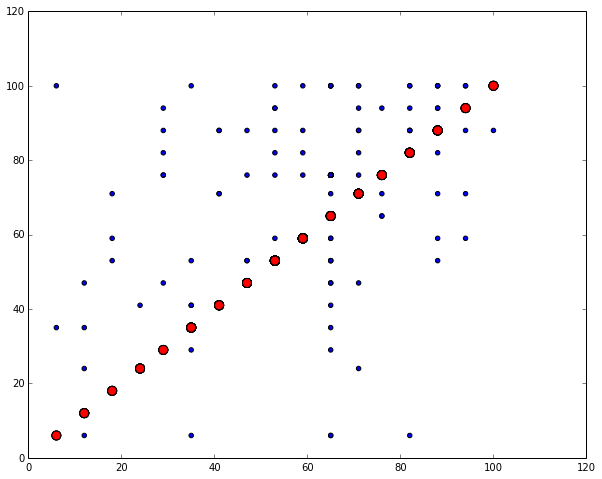

In [9]:
idxs = [13,16]
plt.figure(figsize=(10, 8))
plt.scatter(npData[1,:], npData[2,:])  # plot all points
plt.scatter(npData[idxs,:], npData[idxs,:], c='r', s=80)  # plot interesting points in red again
plt.show()

In [10]:
data.index

Index([u'GenderBalance|MenTalkDifferently',
       u'GenderBalance|MustProveMyselfDaily', u'GenderBalance|NoClearValues',
       u'GenderBalance|TreatedDifferently', u'GenderBalance|UsuallyOnlyWoman',
       u'Manager|AmOnMyOwn', u'Manager|ExpectedToAlreadyKnow',
       u'Manager|HesitateNewChallenges', u'Manager|MatesQuestionWorkQuality',
       u'Manager|MatesUninvolved', u'Manager|Micromanages',
       u'Manager|NoGrowthAssignments',
       u'PersonalExperience|EvaledNegativelyForShortcomings',
       u'PersonalExperience|ILackConfidence',
       u'PersonalExperience|NobodyToldExpectations',
       u'PersonalExperience|TeamNotValuesMyWork',
       u'PersonalExperience|UnsureHowSuccessful',
       u'PersonalExperience|UnsureWhetherGoodEnough', u'Team|Alienated',
       u'Team|DontSocialize', u'Team|GetsInWay', u'Team|HardToInfluence',
       u'Team|HoHum', u'Team|Invisible', u'Team|LooseGroup',
       u'Team|MenShouldChange', u'Team|MustProveMySelf',
       u'Team|NobodyToTalkTo', u'

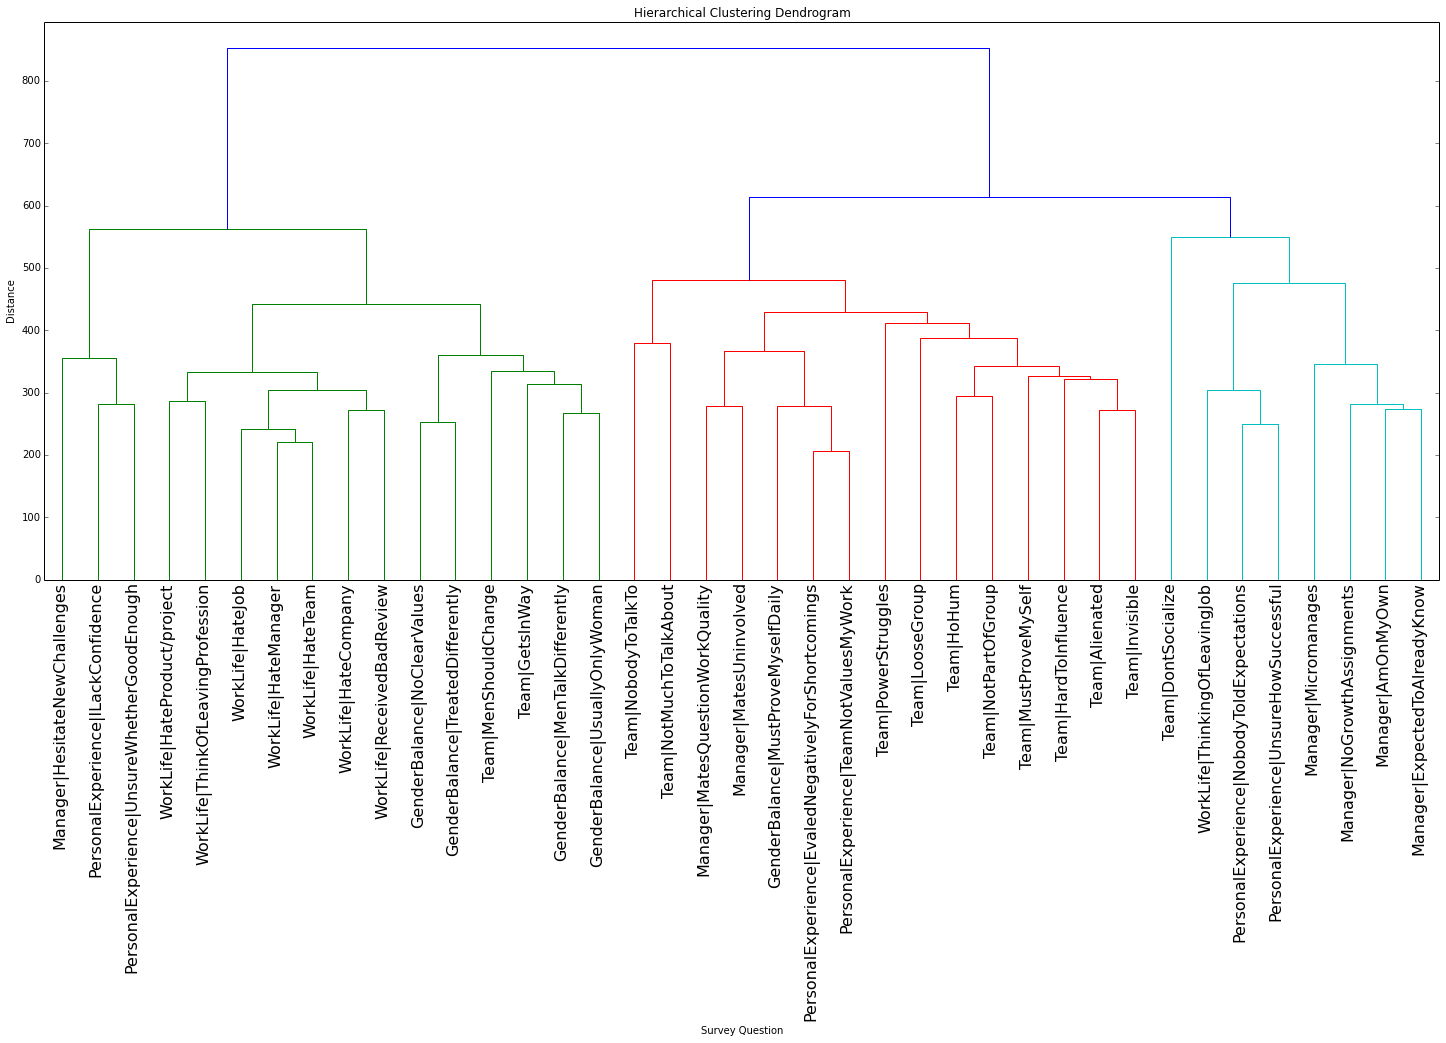

In [11]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Survey Question')
plt.ylabel('Distance')
dendrogram(
    clusterInfo,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=16.,  # font size for the x axis labels
    labels=data.index,  # question names
)
plt.show()



In [12]:
# set cut-off to 50
max_d = 420 # max_d as in max_distance

In [17]:
plt.figure(figsize=(20, 10))
utils.fancy_dendrogram(
    clusterInfo,
    x_label='Survey Question',
    #***truncate_mode='lastp',
    p=4,
    leaf_rotation=90.,
    leaf_font_size=14.,
    x_axis_font_size=16.,
    y_axis_font_size=16.,
    labels=data.index,
    show_contracted=True,
    annotate_above=1000, # Make high enough never to get distance labels in chart
    max_d=max_d,  # plot a horizontal cut-off line
)
plt.show()



TypeError: dendrogram() got an unexpected keyword argument 'x_axis_font_size'